In [40]:
# %run xrdutils.py
from xrdc import xrdutils as xdu
from xrdc import visualization as vis
from xrdc import grid_data as gd

In [41]:
xdu

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

In [15]:
import os
import re
import sys
import sklearn as skl
import math

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sklearn.cluster

import glob

from data_grid import DataGrid

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/"

from data_grid import DataGrid

dgrid = DataGrid(path, """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv""",range=None)

Loading Data from: ../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully


In [13]:
from importlib import reload
reload(xdu)

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

(177, 800)


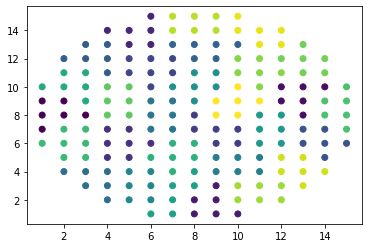

In [65]:
X=dataGrid.get_data_array()
q=dataGrid.data[1][:,0]

N = X.shape[0]

coords = np.array([np.array(dgrid.coord(ii+1)) for ii in range(N)])

Y = gd.group_by_coord(coords, 6)

plt.scatter(*(coords.T), c = Y)

In [138]:
def gen_data(augment = True):
    X=dataGrid.get_data_array()
    q=dataGrid.data[1][:,0]

    N = X.shape[0]

    coords = np.array([np.array(dgrid.coord(ii+1)) for ii in range(N)])

    Y = gd.group_by_coord(coords, 6)

    plt.scatter(*(coords.T), c = Y)
    if augment:
        X, Y = xdu.augment(X, Y, .8, 1.2, q, N = 10, scale_type = 'scale')
    X, Y = xdu.standardize_input(X, Y)
    return X, Y

from sklearn.neighbors import KernelDensity
import numpy as np

def approx_mean_density(XX, YY):
    a, b = vis.xrd_to_embedding(XX, YY, net, utils.get_embedding)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(a)

    return np.exp(kde.score_samples(a)).mean()

In [46]:
reload(xdu)

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

In [47]:
prefix = 'TiNiSn'
XX, YY = xdu.augment(X, Y, .8, 1.2, q, N = 10, scale_type = 'scale')

(177, 800)


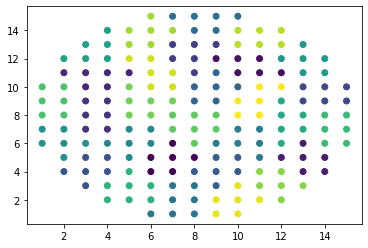

In [88]:
# XX_test, YY_test = xdu.augment(X, Y, .8, 1.2, q, N = 10, scale_type = 'scale')
XX_test, YY_test = gen_data(augment = False)

In [61]:
XX_test, YY_test = xdu.standardize_input(XX_test, YY_test)

In [48]:
XX, YY = xdu.standardize_input(XX, YY)
X, Y = xdu.standardize_input(X, Y)

In [89]:
xdu.write_train_test("data/{}/".format(prefix), XX, YY,
                 XX_test,\
                 YY_test)

In [90]:
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $prefix \
    --n_classes 29 --epochs 200

  0%|          | 0/11200 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 11200/11200 [03:07<00:00, 59.84it/s, epoch=199, train_loss=0.0521, val_loss=0.0495]


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-TiNiSn-*


In [139]:
approx_mean_density(XX_test, YY_test)

1.5387249630387945

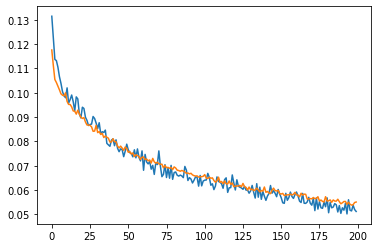

In [78]:
plt.plot(stats_collector['train_loss'])
plt.plot(stats_collector['val_loss'])

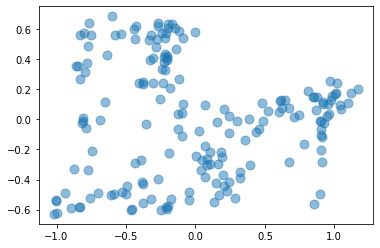

In [132]:
pca, Xpca = vis.xrd_to_pca_original(net, original_test_loader, utils.get_embedding)
plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 80)

In [ ]:
# should be the same
# pca, Xpca = vis.xrd_to_embedding(XX_test, YY_test, net, utils.get_embedding)

# plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 80)

In [140]:
name = prefix + "_400epoch"
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $name \
    --n_classes 29 --epochs 400

  0%|          | 0/22400 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 22400/22400 [06:51<00:00, 54.39it/s, epoch=399, train_loss=0.0355, val_loss=0.0346]


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-TiNiSn_400epoch-*


In [143]:
approx_mean_density(XX_test, YY_test)

1.0842850383085538

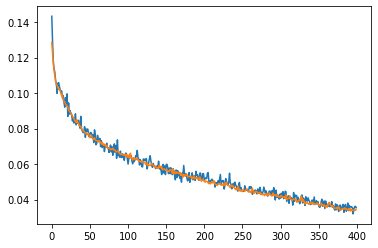

In [144]:
plt.plot(stats_collector['train_loss'])
plt.plot(stats_collector['val_loss'])

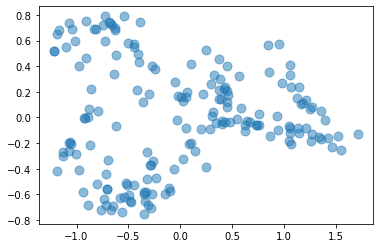

In [142]:
pca, Xpca = vis.xrd_to_pca_original(net, original_test_loader, utils.get_embedding)
plt.scatter(*(Xpca.T) , cmap='jet', alpha = .5, s = 80)

  0%|          | 0/44800 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


 45%|████▍     | 19992/44800 [06:05<07:34, 54.64it/s, epoch=356, train_loss=0.0365, val_loss=0.0345]


KeyboardInterrupt: 

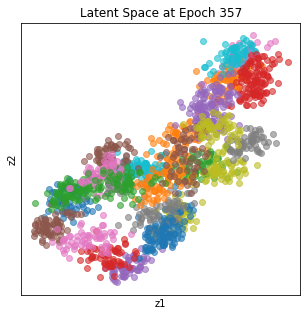

In [57]:
name = prefix + "_800epoch"
%run ../../siamese-net-and-friends/train.py siamese-constrastive_1d XRD --train_path data/$prefix/train/ --test_path data/$prefix/test/\
    --name $name \
    --n_classes 29 --epochs 800

In [111]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = np.array([[-1, -1], [-2, -1], [-1, -1], [-1, -1], [-1, -1]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X).mean()

0.8806000615512714